In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/kaggle"

In [3]:
ls


gdrive/  sample_data/


In [4]:
%cd /content/gdrive/My Drive/kaggle

/content/gdrive/My Drive/kaggle


In [5]:
pwd

'/content/gdrive/My Drive/kaggle'

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
d = pd.read_csv('/content/gdrive/My Drive/kaggle/bank_notes.csv',encoding='latin1')

In [9]:
ls

Adriver.csv     bank_notes.csv  ltOCV.xls      Maldata.csv
AutoDriver.xls  EVTest.csv      LUS_covid.csv


In [19]:
df = pd.DataFrame(d)
df.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


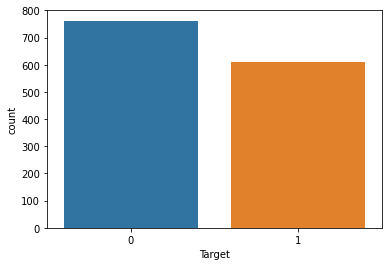

In [20]:
sns.countplot(x='Target',data=df)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


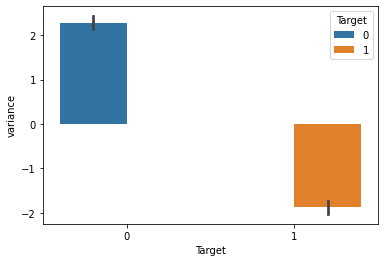

In [22]:
sns.barplot(x='Target',y='variance',data=df,hue='Target')

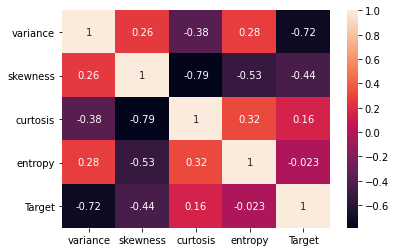

In [25]:
heatmp = df.corr()
sns.heatmap(heatmp,annot=True)

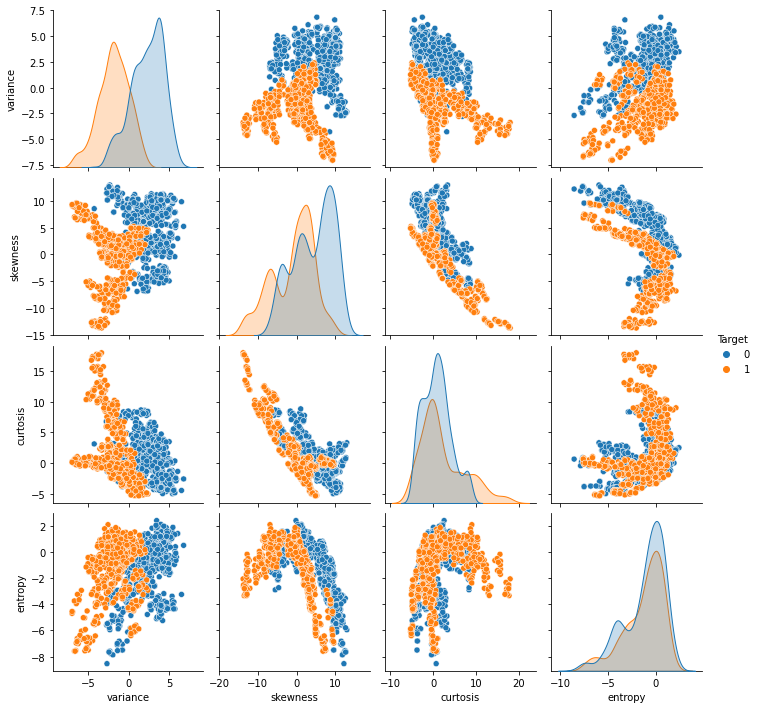

In [28]:
sns.pairplot(df,hue='Target')


In [29]:
df['Target'].value_counts()

0    762
1    610
Name: Target, dtype: int64

In [32]:
X=df.drop('Target',axis=1)

In [36]:
feat = pd.DataFrame(X)
y=df['Target']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat, y, test_size=0.30,stratify=y )
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print (confusion_matrix(y_test,prediction))
print('\n')
print (classification_report(y_test,prediction))
print('\n')
print (accuracy_score(y_test,prediction))
print('\n')
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_train,y_train)))
print ('Accuracy on training set:{:.3f}'.format(dtree.score(X_test,y_test)))

[[225   4]
 [  3 180]]


              precision    recall  f1-score   support

           0       0.99      0.98      0.98       229
           1       0.98      0.98      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



0.9830097087378641


Accuracy on training set:1.000
Accuracy on training set:0.983


In [38]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=12)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
print (confusion_matrix(y_test,rfc_pred))
print('\n')
print (classification_report(y_test,rfc_pred))
print('\n')
print (accuracy_score(y_test,rfc_pred))

[[228   1]
 [  0 183]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       229
           1       0.99      1.00      1.00       183

    accuracy                           1.00       412
   macro avg       1.00      1.00      1.00       412
weighted avg       1.00      1.00      1.00       412



0.9975728155339806
